# Simulación del Modelo de Tres Niveles para Iones de Erbio (Er³⁺)
### Amplificación óptica en fibras dopadas con Erbio
Hecho por:
- Santiago Vélez Arboleda
- César Augusto Montoya Ocampo

## Resumen
Este proyecto presenta una simulación computacional del proceso de amplificación óptica en medios dopados con iones de erbio (Er³⁺), empleando un modelo físico de tres niveles energéticos. El objetivo principal fue modelar la dinámica temporal de las poblaciones de iones en función de distintos parámetros experimentales, como la potencia y la longitud de onda del bombeo óptico. Para ello, se implementaron numéricamente ecuaciones diferenciales acopladas que describen las transiciones entre el estado fundamental, el estado metaestable y el estado excitado de los iones Er³⁺.

Se integró un espectro de absorción representativo que permite al usuario modificar la longitud de onda de bombeo y observar su efecto sobre la tasa de absorción, la emisión estimulada y la eficiencia cuántica del sistema. Además, se generaron gráficas interactivas que muestran la evolución temporal de las poblaciones, así como el espectro de emisión correspondiente a 1530 nm, típica de los amplificadores ópticos (EDFA). Los resultados permiten visualizar la inversión de población, cuantificar la eficiencia cuántica y analizar cómo varía el rendimiento del sistema frente a distintas condiciones de operación. Esta simulación es útil como herramienta de enseñanza y diseño en el contexto de la fotónica y las telecomunicaciones ópticas.

## Objetivos

### Objetivo general
Desarrollar una simulación computacional del proceso de amplificación óptica en medios dopados con iones de erbio (Er³⁺), utilizando un modelo físico de tres niveles energéticos que permita visualizar y analizar la dinámica de poblaciones, el espectro de emisión y la eficiencia cuántica en función de distintos parámetros experimentales.

### Objetivos específicos
1. Implementar un modelo físico de tres niveles que represente las transiciones energéticas clave del ion Er³⁺: absorción, relajación no radiativa y emisión radiativa.
2. Incorporar un espectro de absorción interpolado para permitir la simulación con diferentes longitudes de onda de bombeo y estudiar su influencia sobre la tasa de bombeo.
3. Simular la dinámica temporal de las poblaciones de los niveles energéticos bajo excitación continua y con apagado del láser, resolviendo numéricamente el sistema de ecuaciones diferenciales.
4. Generar gráficas y animaciones que representen la evolución de las poblaciones y el espectro de emisión correspondiente, permitiendo interpretar fenómenos como la inversión de población y la emisión estimulada.
5. Calcular la eficiencia cuántica del sistema en diferentes condiciones de bombeo, analizando la relación entre la potencia absorbida y la tasa de emisión.

## Marco teórico

La amplificación óptica basada en iones de erbio (Er³⁺) constituye una de las tecnologías más relevantes en sistemas de telecomunicaciones por fibra óptica. Su principio fundamental se basa en la emisión estimulada de radiación, fenómeno descrito por primera vez por Albert Einstein en 1917, y que sienta las bases del funcionamiento de los láseres y amplificadores ópticos. En particular, los **amplificadores ópticos dopados con Er³⁺ (EDFA, por sus siglas en inglés)** se utilizan para restaurar la señal óptica sin necesidad de conversión electro-óptica, lo que reduce pérdidas y aumenta la eficiencia en enlaces de larga distancia.

#### Niveles de energía en Er³⁺

El ion Er³⁺ (Erbio triplemente ionizado) posee múltiples niveles electrónicos dentro de la configuración 4f¹¹. En aplicaciones prácticas se utiliza un modelo simplificado de **tres niveles efectivos**, que agrupan los principales estados implicados en la amplificación:

* **Nivel 0 (fundamental)**: $^4I_{15/2}$
* **Nivel 1 (metaestable)**: $^4I_{13/2}$ → emite luz en torno a 1530 nm
* **Nivel 2 (excitado)**: $^4I_{11/2}$ → absorbente en torno a 980 nm

Cuando se aplica bombeo óptico, típicamente a 980 nm o 1480 nm, los iones absorben fotones y transitan del nivel 0 al nivel 2. Desde allí, sufren una **relajación no radiativa ultrarrápida** al nivel 1. Una vez en el nivel metaestable, pueden decaer al estado fundamental mediante **emisión espontánea** o **estimulada**, siendo esta última la responsable de la amplificación óptica.

#### Dinámica de poblaciones

La evolución temporal de las poblaciones $N_0, N_1, N_2$ de los tres niveles se describe mediante un conjunto de ecuaciones diferenciales acopladas que consideran:

* La **tasa de bombeo** $W = \dfrac{\sigma_a P_{\text{pump}}}{A_{\text{eff}} h\nu}$, que depende de la **sección eficaz de absorción** $\sigma_a$, la potencia de bombeo $P_{\text{pump}}$, el área efectiva del modo $A_{\text{eff}}$, y la frecuencia $\nu$.
* Las **vidas medias** de los niveles excitados y metaestables: $\tau_{21}$ para la relajación no radiativa y $\tau_{10}$ para la emisión espontánea.
* Un posible decaimiento directo $\tau_{20}$ del nivel 2 al 0, aunque suele ser despreciable en la práctica.

La solución de estas ecuaciones permite conocer el grado de **inversión de población**, condición indispensable para que ocurra la amplificación mediante emisión estimulada.

### Ecuaciones de dinámica poblacional 

Para el desarrollo del simulador de Erbio $\mathrm{Er}^{3+}$ basado en un modelo de tres niveles
energéticos, orientado a analizar la dinámica poblacional y la eficiencia de emisión
bajo diferentes condiciones de bombeo óptico. Este modelo resuelve un sistema de
ecuaciones diferenciales acopladas que describen la evolución temporal de las
poblaciones $N_1$, $N_2$ y $N_3$ correspondientes a los niveles fundamentales, intermedio y
excitado respectivamente. Las ecuaciones consideran procesos de absorción,
emisión espontánea y emisión estimulada, definidos por:

1. $\dfrac{dN_3}{dt} = W_p N_1 - \dfrac{N_3}{\tau_{32}}$  
2. $\dfrac{dN_2}{dt} = \dfrac{N_3}{\tau_{32}} - \dfrac{N_2}{\tau_{21}} - W_s N_2 + W_s N_1$  
3. $\dfrac{dN_1}{dt} = \dfrac{N_2}{\tau_{21}} - W_p N_1 + W_s N_2 - W_s N_1$

Donde
1. $W_p = \dfrac{\sigma_a \lambda_p P_p}{h v_p A_{\text{eff}}}$ es la tasa de absorción debida al bombeo a longitud de onda $\lambda_p$.
2. $W_s = \dfrac{\sigma_e \lambda_s P_s}{h v_s A_{\text{eff}}}$ es la tasa de emisión estimulada a la longitud de onda $\lambda_s$. 
3. Los parámetros $\tau_{32}$ y $\tau_{21}$ representan los tiempos de vida de los niveles de energía 3 y 2, respectivamente. Específicamente:

- $\tau_{32}$: tiempo de vida del nivel 3 antes de decaer al nivel 2.  
- $\tau_{21}$: tiempo de vida del nivel 2 antes de decaer al nivel 1.

4. $A_{\text{eff}}$ es el área efectiva del modo óptico. Representa el área transversal sobre la cual se distribuye la intensidad del campo óptico en una fibra o guía de onda.
5. $h$ y $v$ representan la constante de Planck y la frecuencia correspondiente a la longitud de onda utilizada, respectivamente.

Al momento de resolver estas ecuaciones tanto en régimen transitorio como
estacionario mediante métodos numéricos de integración, permitiendo observar la
evolución temporal de las poblaciones y cuantificar fenómenos como la saturación de
ganancia o la eficiencia de emisión en función de la potencia de bombeo.
Adicionalmente, se integró un análisis espectral que permite barrer distintas
longitudes de onda del láser de bombeo, generando gráficas del espectro de absorción
y emisión del medio activo. 

Además, es fundamental considerar la conservación de la población total de iones $\mathrm{Er}^{3+}$ dentro del sistema. Esto implica que la suma de las fracciones de población en cada nivel energético debe permanecer constante a lo largo del tiempo, asumiendo que no hay generación ni pérdida neta de iones. Matemáticamente, esta condición se expresa como:

$$
N_1 + N_2 + N_3 = N_{\text{total}}
$$

Donde $N$ representa la concentración total de iones de erbio en el medio activo. Esta restricción permite reducir el número de variables independientes del sistema y garantiza la coherencia física del modelo.

### Tasa de bombeo y sección eficaz

La tasa de bombeo $W_{\text{pump}}$ representa la velocidad con la que los iones dopantes son excitados desde el nivel fundamental a un nivel energético superior mediante la absorción de fotones provenientes de una fuente de bombeo óptico. Esta tasa depende tanto de las características del medio activo como de las propiedades del haz láser incidente.

Físicamente, se define como la tasa de absorción óptica por ion activo, y está dada por la expresión:

$$
W_{\text{pump}} = \frac{\sigma_a P}{h \nu A_{\text{eff}}}
$$

Donde:

Así, $\sigma_a$ es la **sección eficaz de absorción** $[\text{cm}^2]$, la cual cuantifica la probabilidad de que un ion absorba un fotón a una frecuencia dada.

Por otra parte, $P$ es la **potencia óptica incidente** $[W]$, $A_{\text{eff}}$ es el **área efectiva** del modo óptico, y $h$ y $\nu$ son la **constante de Planck** y la **frecuencia** correspondiente a la longitud de onda utilizada, respectivamente. Con esto se puede conocer la **energía del fotón incidente**.

La **sección eficaz de absorción** es una función espectral que varía con la longitud de onda, y determina qué tan eficiente es el medio para absorber luz en un rango específico del espectro.

Para el **Er³⁺**, por ejemplo, los picos de absorción relevantes suelen encontrarse en la región cercana a **980 nm** y **1480 nm**, dependiendo del *host* (vidrio o cristal) y la configuración energética.

#### Espectro de emisión

El espectro de emisión de los iones $\mathrm{Er}^{3+}$ en medios vítreos o dopados se caracteriza por transiciones electrónicas entre niveles intra-$4f$, que generan bandas anchas en la región del infrarrojo cercano. Debido al entorno amorfo del vidrio y a las fluctuaciones locales del campo cristalino, estas transiciones no presentan líneas espectrales discretas, sino que aparecen como bandas de emisión amplias.

Estas bandas pueden modelarse eficazmente mediante perfiles gaussianos, los cuales describen la distribución espectral de intensidad en función de la longitud de onda o la frecuencia. Una función gaussiana típica tiene la forma:

$$I(\lambda) = I_0 e^{\left( -4 ln \left( \frac{2(\lambda - \lambda_0)^2}{FWHM^2} \right)\right)}$$

Donde:

1. $I(\lambda)$ es la intensidad en la longitud de onda $\lambda$.  
2. $I_0$ es la intensidad máxima en la longitud de onda central $\lambda_0$.  
3. $\mathrm{FWHM}$ (Full Width at Half Maximum, o ancho completo a media altura) es el parámetro que indica la anchura de la banda a la mitad de su altura máxima.


El uso de un perfil gaussiano está justificado por el hecho de que los procesos de ensanchamiento inhomogéneo —como los originados por desorden estructural en matrices vítreas— tienden a generar distribuciones de líneas espectrales con forma aproximadamente gaussiana. En estos casos, la anchura espectral depende del entorno local de cada ion y de la distribución estadística de estos entornos.

Por tanto, modelar el espectro de emisión de los iones $\mathrm{Er}^{3+}$ mediante una o varias gaussianas permite no solo describir correctamente la forma espectral observada experimentalmente, sino también extraer parámetros fundamentales como el $\mathrm{FWHM}$ y la posición de la banda, los cuales son esenciales para analizar la eficiencia de emisión y el acoplamiento con cavidades ópticas o filtros.

El perfil espectral de emisión, modelado mediante funciones gaussianas, está directamente vinculado con el modelo dinámico de poblaciones. La intensidad espectral observada depende de la población de los niveles excitados, calculada a partir del sistema de ecuaciones dinámicas en estado estacionario. Al multiplicar esta población por la probabilidad de emisión radiativa y aplicar un perfil gaussiano con un $\mathrm{FWHM}$ característico, se obtiene la forma y amplitud del espectro. Esta conexión permite predecir el comportamiento espectral del ion $\mathrm{Er}^{3+}$ bajo diferentes condiciones de excitación.

#### Eficiencia cuántica

La **eficiencia cuántica** (𝜂ₛ) es un parámetro fundamental que describe el rendimiento interno de un sistema emisivo, como un material dopado con iones activos.

Se define como el cociente entre la **tasa de emisión radiativa** y la **tasa de absorción óptica**, es decir, la fracción de iones excitados que relajan hacia el estado fundamental mediante la **emisión de un fotón**:

$$
\eta_q = \frac{\text{Tasa de emisión radiativa}}{\text{Tasa de absorción óptica}}
$$

Una eficiencia cuántica del **100 %** implica que cada fotón absorbido genera exactamente un fotón emitido, lo cual es ideal pero no siempre alcanzable debido a procesos **no radiativos** (como relajaciones por fonones o transferencia de energía entre iones).

En sistemas como los dopados con $ \text{Er}^{3+} $, esta eficiencia depende críticamente del entorno del ion (por ejemplo, la **matriz vítrea** o **cristalina**), de la **concentración del dopante** y de la **longitud de onda del bombeo**.

#### Aplicaciones

La tecnología EDFA es fundamental en:

* Redes ópticas de largo alcance (transoceánicas, troncales).
* Multiplexación por longitud de onda (DWDM).
* Sistemas de sensores distribuidos por fibra óptica.
* Espectroscopía, imágenes biomédicas y desarrollo de láseres sintonizables.


## Implementación numérica

El modelo fue implementado utilizando la librería **SciPy**, de ésta, específicamente la función `solve_ivp` para la integración de **ecuaciones diferenciales ordinarias (EDOs)**.

Se utilizó un sistema de EDOs acopladas que describe la **evolución temporal** de las variables principales del sistema. Estas variables representan **magnitudes físicas relevantes** como concentración, temperatura o población, según el contexto del modelo.

La simulación permite **visualizar la dinámica del sistema** bajo distintas **condiciones iniciales** y **parámetros**, proporcionando una herramienta flexible para el análisis numérico del comportamiento del sistema.

### Justificación del método numérico (ODEs acopladas)

El sistema presenta **interacciones dinámicas entre múltiples variables dependientes del tiempo**, lo que lo hace adecuado para una formulación mediante **ecuaciones diferenciales ordinarias (EDOs) acopladas**.

Estas ecuaciones permiten describir la **evolución conjunta y dependiente** de las variables bajo estudio, capturando de forma precisa efectos como:

- **Retroalimentación**
- **Acoplamiento no lineal**
- **Tasas de cambio interdependientes**

El método numérico utilizado —**integración mediante `solve_ivp`**, que emplea métodos adaptativos como **Runge-Kutta de orden 5(4)**— garantiza **precisión y estabilidad** tanto para sistemas **rígidos** como **no rígidos**.

### Módulos y parámetros empleados (con unidades y rangos razonables)

La implementación emplea los siguientes módulos de Python:

- **`numpy`**: para operaciones numéricas y manejo de arrays.
- **`scipy.integrate.solve_ivp`**: para resolver el sistema de EDOs.
- **`matplotlib.pyplot`**: para graficar los resultados de la simulación.

A continuación se listan algunos parámetros representativos utilizados en el modelo, junto con sus unidades y rangos razonables:

| Parámetro                  | Descripción                            | Unidad         | Rango típico        |
|---------------------------|----------------------------------------|----------------|---------------------|
| `N₀`                      | Concentración inicial de iones         | cm⁻³           | 1×10¹⁸ – 1×10²¹     |
| `P_láser`                 | Potencia del bombeo                    | mW             | 1 – 500             |
| `λ_p`                     | Longitud de onda del bombeo            | nm             | 980 / 1480          |
| `τ_rad`                   | Tiempo de vida radiativa               | ms             | 1 – 10              |
| `σ_abs`                   | Sección eficaz de absorción            | cm²            | 1×10⁻²¹ – 1×10⁻²⁰   |
| `T`                       | Temperatura del sistema                | K              | 300 – 600           |
| `Δt`                      | Paso de tiempo para simulación         | s              | 1×10⁻⁶ – 1×10⁻²     |
| `t_final`                 | Tiempo total de simulación             | s              | 0.01 – 10           |

> **Nota**: Los valores y rangos dependen del sistema físico modelado (por ejemplo, un material dopado con Er³⁺ en una matriz vítrea).

## Código

### Librerías

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint
from scipy.constants import h, c
import matplotlib.patches as patches
from scipy.interpolate import interp1d
import os

### Funciones 

In [86]:
# =============================================================================
# SIMULACIÓN DE IONES DE ERBIO (Er³⁺) - MODELO DE 3 NIVELES
# =============================================================================

max_intensity = 0


class ErbiumSimulator:
    """
    Simulador avanzado para iones de Erbio con modelo de 3 niveles energéticos
    """

    def __init__(
        self,
        N0=1e24,
        P_pump=10e-3,
        tau21=1e-6,
        tau10=10e-3,
        tau20=0.1e-6,
        lambda_pump=980e-9,
    ):
        """
        Inicializa el simulador con parámetros físicos

        N0          : densidad total de iones [iones/m³]
        P_pump      : potencia óptica del láser de bombeo [W]
        tau21       : tiempo de relajación no radiativa 2→1 [s]
        tau10       : vida del nivel metaestable 1→0 [s]
        tau20       : decaimiento directo 2→0 [s]
        lambda_pump : longitud de onda de bombeo [m]
        """
        self.N0 = N0
        self.P_pump = P_pump
        self.tau21 = tau21
        self.tau10 = tau10
        self.tau20 = tau20
        self.lambda_pump = lambda_pump

        # Constantes físicas
        self.h = h
        self.c = c
        self.lambda_emission = 1530e-9  # longitud de onda de emisión del erbio [m]
        self.A_eff = 80e-12  # área efectiva del modo [m²]

        # Datos experimentales de sección eficaz de absorción vs longitud de onda
        self._setup_absorption_data()

        # Para el espectro de emisión
        self.emission_fwhm = 40e-9  # [m]

        # Actualizar parámetros dependientes de la longitud de onda
        self._update_wavelength_dependent_params()

    def _setup_absorption_data(self):
        """
        Configura los datos de sección eficaz de absorción del Er³⁺
        """
        wavelengths_nm = np.array(
            [
                400,
                450,
                500,
                520,
                540,
                650,
                800,
                850,
                900,
                950,
                975,
                980,
                985,
                1000,
                1450,
                1460,
                1470,
                1480,
                1490,
                1500,
                1510,
                1520,
                1530,
                1540,
                1550,
                1560,
            ]
        )
        sigma_abs_m2 = np.array(
            [
                1e-26,
                5e-26,
                1e-25,
                2e-25,
                3e-25,
                1e-25,
                5e-25,
                1e-24,
                2e-24,
                2.2e-24,
                2.5e-24,
                2.8e-24,
                2.5e-24,
                2e-24,
                1e-25,
                2e-25,
                4e-25,
                6e-25,
                8e-25,
                1e-24,
                1.2e-24,
                1.5e-24,
                1.8e-24,
                1.5e-24,
                1.2e-24,
                8e-25,
            ]
        )
        self.sigma_absorption_interp = interp1d(
            wavelengths_nm * 1e-9,
            sigma_abs_m2,
            kind="cubic",
            bounds_error=False,
            fill_value=1e-26,
        )

    def get_absorption_cross_section(self, wavelength):
        return self.sigma_absorption_interp(wavelength)

    def set_pump_wavelength(self, lambda_pump):
        self.lambda_pump = lambda_pump
        self._update_wavelength_dependent_params()

    def _update_wavelength_dependent_params(self):
        self.nu_pump = self.c / self.lambda_pump
        self.sigma_a_p = self.get_absorption_cross_section(self.lambda_pump)
        self.W_pump = (self.sigma_a_p * self.P_pump) / (
            self.A_eff * self.h * self.nu_pump
        )

    def three_level_ode(self, y, t, pump_on=True):
        N0, N1, N2 = y
        pump_rate = self.W_pump if pump_on else 0
        dN0_dt = N1 / self.tau10 + N2 / self.tau20 - pump_rate * N0
        dN1_dt = N2 / self.tau21 - N1 / self.tau10
        dN2_dt = pump_rate * N0 - N2 / self.tau21 - N2 / self.tau20
        return [dN0_dt, dN1_dt, dN2_dt]

    def simulate_dynamics(self, t_total=0.1, dt=1e-5, laser_off_time=None):
        t = np.arange(0, t_total, dt)
        initial_conditions = [self.N0, 0, 0]
        if laser_off_time is None:
            solution = odeint(self.three_level_ode, initial_conditions, t, args=(True,))
        else:
            t_on = t[t <= laser_off_time]
            t_off = t[t > laser_off_time]
            sol_on = odeint(
                self.three_level_ode, initial_conditions, t_on, args=(True,)
            )
            sol_off = odeint(
                self.three_level_ode, sol_on[-1], t_off - laser_off_time, args=(False,)
            )
            solution = np.vstack([sol_on, sol_off])
        return t, solution[:, 0], solution[:, 1], solution[:, 2]

    def generate_emission_spectrum(
        self, N1_population, wavelength_range=(1450e-9, 1610e-9), points=1000
    ):
        wavelengths = np.linspace(wavelength_range[0], wavelength_range[1], points)
        total_rate = N1_population / self.tau10
        sigma = self.emission_fwhm / (2 * np.sqrt(2 * np.log(2)))
        G = np.exp(-0.5 * ((wavelengths - self.lambda_emission) / sigma) ** 2)
        G /= np.trapezoid(G, wavelengths)
        intensity_m = total_rate * G
        wavelengths_nm = wavelengths * 1e9
        intensity_nm = intensity_m * 1e-9
        return wavelengths_nm, intensity_nm

    def plot_absorption_spectrum(self, filename="absorption_spectrum.png"):
        """
        Grafica y guarda el espectro de absorción del Er³⁺ en un archivo.
        """
        plt.figure(figsize=(12, 6))
        wavelengths_nm = np.linspace(400, 1600, 1000)
        wavelengths_m = wavelengths_nm * 1e-9
        sigma_values = [self.get_absorption_cross_section(w) for w in wavelengths_m]

        plt.semilogy(wavelengths_nm, np.array(sigma_values) * 1e24, "b-", linewidth=2)
        plt.axvline(
            self.lambda_pump * 1e9,
            color="red",
            linestyle="--",
            linewidth=2,
            label=f"Bombeo actual: {self.lambda_pump * 1e9:.0f} nm",
        )
        plt.xlabel("Longitud de onda [nm]")
        plt.ylabel(r"Sección eficaz de absorción [$10^{-24}$m²]")
        plt.title("Espectro de Absorción del Er³⁺")
        plt.grid(True, alpha=0.3)
        plt.axvspan(975, 985, alpha=0.2, color="green", label="Banda 980 nm")
        plt.axvspan(1450, 1600, alpha=0.2, color="orange", label="Banda 1530 nm")
        plt.axvspan(800, 850, alpha=0.2, color="purple", label="Banda 808 nm")
        plt.legend()

        plt.savefig(filename)
        plt.show()
        plt.close()
        print(f"-> Gráfica de espectro de absorción guardada como: {filename}")

    def wavelength_sweep_analysis(self, wavelength_range=(800e-9, 1600e-9), points=50):
        wavelengths = np.linspace(wavelength_range[0], wavelength_range[1], points)
        steady_state_N1, steady_state_N2, emission_rates, pump_efficiencies = (
            [],
            [],
            [],
            [],
        )
        original_wavelength = self.lambda_pump
        for wavelength in wavelengths:
            self.set_pump_wavelength(wavelength)
            t, N0, N1, N2 = self.simulate_dynamics(t_total=0.1)
            N1_steady, N2_steady = N1[-1], N2[-1]
            emission_rate = N1_steady / self.tau10
            pump_power_absorbed = self.W_pump * N0[-1] * self.h * self.nu_pump
            pump_efficiency = (
                (emission_rate * self.h * self.c / self.lambda_emission)
                / pump_power_absorbed
                if pump_power_absorbed > 0
                else 0
            )
            steady_state_N1.append(N1_steady)
            steady_state_N2.append(N2_steady)
            emission_rates.append(emission_rate)
            pump_efficiencies.append(pump_efficiency)
        self.set_pump_wavelength(original_wavelength)
        return (
            wavelengths * 1e9,
            np.array(steady_state_N1),
            np.array(steady_state_N2),
            np.array(emission_rates),
            np.array(pump_efficiencies),
        )

    def plot_wavelength_sweep(self):
        """
        Crea y guarda las gráficas del barrido de longitud de onda como archivos separados.
        """
        wavelengths_nm, N1_steady, N2_steady, emission_rates, efficiencies = (
            self.wavelength_sweep_analysis()
        )

        # Poblaciones
        plt.figure(figsize=(8, 6))
        plt.plot(wavelengths_nm, N1_steady, "r-", linewidth=2, label="Nivel 2 (emisor)")
        plt.plot(
            wavelengths_nm, N2_steady, "g-", linewidth=2, label="Nivel 3 (excitado)"
        )
        plt.axvline(
            self.lambda_pump * 1e9,
            color="black",
            linestyle="--",
            alpha=0.7,
            label="Bombeo actual",
        )
        plt.xlabel("Longitud de onda de bombeo [nm]")
        plt.ylabel("Población en estado estacionario [iones/m³]")
        plt.title("Poblaciones vs Longitud de Onda de Bombeo")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.savefig("sweep_populations.png")
        plt.show()
        plt.close()
        print(
            "-> Gráfica de poblaciones del barrido guardada como: sweep_populations.png"
        )

    def compare_wavelengths(self, wavelengths_to_compare, t_total=0.1):
        """
        Compara y guarda las dinámicas temporales para diferentes longitudes de onda en archivos separados.
        """
        colors = ["red", "blue", "green", "orange", "purple", "brown"]
        original_wavelength = self.lambda_pump

        # Crear figuras para cada subplot
        fig1, ax1 = plt.subplots(figsize=(8, 6))
        fig3, ax3 = plt.subplots(figsize=(8, 6))

        for i, wavelength in enumerate(wavelengths_to_compare):
            self.set_pump_wavelength(wavelength * 1e-9)
            t, N0, N1, N2 = self.simulate_dynamics(t_total=t_total)
            color = colors[i % len(colors)]
            label = f"{wavelength} nm"

            ax1.plot(t * 1000, N1, color=color, linewidth=2, label=f"N1 - {label}")
            wavelengths_em, spectrum = self.generate_emission_spectrum(N1[-1])
            ax3.plot(wavelengths_em, spectrum, color=color, linewidth=2, label=label)

        # Configurar y guardar Gráfica 1
        ax1.set_xlabel("Tiempo [ms]")
        ax1.set_ylabel("Población Nivel 1")
        ax1.set_title("Evolución Temporal - Nivel Emisor")
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        fig1.savefig("compare_N1_evolution.png")
        print("-> Gráfica de comparación de N1 guardada como: compare_N1_evolution.png")

        # Configurar y guardar Gráfica 3
        ax3.set_xlabel("Longitud de onda [nm]")
        ax3.set_ylabel("Intensidad [fotones/(s × nm)]")
        ax3.set_title("Espectros de Emisión (Estado Estacionario)")
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        fig3.savefig("compare_emission_spectra.png")
        plt.show()
        plt.close(fig3)
        print(
            "-> Gráfica de comparación de espectros guardada como: compare_emission_spectra.png"
        )

        self.set_pump_wavelength(original_wavelength)

    def _draw_energy_levels(self, ax, N0, N1, N2):
        levels, energies = [0, 1, 2], [0, 0.8, 1.3]
        for i, (level, energy) in enumerate(zip(levels, energies)):
            populations = [N0, N1, N2]
            width = populations[i] / self.N0 * 0.4
            ax.hlines(energy, 0.3, 0.7, colors="black", linewidth=2)
            rect = patches.Rectangle(
                (0.5 - width / 2, energy - 0.05),
                width,
                0.1,
                linewidth=1,
                edgecolor="black",
                facecolor=["blue", "red", "green"][i],
                alpha=0.6,
            )
            ax.add_patch(rect)
            ax.text(
                0.8,
                energy,
                f"Nivel {level}\nN={populations[i]:.1e}",
                va="center",
                fontsize=9,
            )
        ax.annotate(
            "",
            xy=(0.15, 1.8),
            xytext=(0.15, 0),
            arrowprops=dict(arrowstyle="->", lw=2, color="green"),
        )
        ax.text(
            0.05,
            0.9,
            f"{self.lambda_pump * 1e9:.0f} nm\n(bombeo)",
            rotation=90,
            ha="center",
            va="center",
            fontsize=8,
        )
        ax.annotate(
            "",
            xy=(0.25, 1),
            xytext=(0.25, 1.8),
            arrowprops=dict(arrowstyle="->", lw=1.5, color="orange", linestyle="--"),
        )
        ax.text(
            0.27, 1.4, "relajación\nno radiativa", ha="left", va="center", fontsize=7
        )
        ax.annotate(
            "",
            xy=(0.35, 0),
            xytext=(0.35, 1),
            arrowprops=dict(arrowstyle="->", lw=2, color="red"),
        )
        ax.text(0.37, 0.5, "1530 nm\n(emisión)", ha="left", va="center", fontsize=8)
        ax.set_xlim(0, 1)
        ax.set_ylim(-0.2, 2.2)
        ax.set_ylabel("Energía [eV]")
        ax.set_title(
            f"Diagrama de Niveles\n$Er^{{3+}}$ - Bombeo: {self.lambda_pump * 1e9:.0f} nm"
        )
        ax.set_xticks([])
        ax.grid(True, alpha=0.3)

    def create_animation(
        self,
        t,
        N0,
        N1,
        N2,
        filename="erbium_animation.gif",
        laser_off_time=None,
        interval=50,
    ):
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))
        ax1.set_xlim(0, t[-1] * 1000)
        ax1.set_ylim(0, self.N0 * 1.1)
        ax1.set_xlabel("Tiempo [ms]")
        ax1.set_ylabel("Población [iones/m³]")
        ax1.set_title("Dinámica de Poblaciones")
        ax1.grid(True, alpha=0.3)
        ax2.set_xlim(0, 1)
        ax2.set_ylim(-0.2, 2)
        ax2.set_ylabel("Energía [eV]")
        ax2.set_title("Niveles Energéticos")
        ax2.set_xticks([])
        ax2.grid(True, alpha=0.3)
        ax3.set_xlim(0, t[-1] * 1000)
        ax3.set_ylim(1, self.N0)
        ax3.set_yscale("log")
        ax3.set_xlabel("Tiempo [ms]")
        ax3.set_ylabel("Población [iones/m³]")
        ax3.set_title("Estados Excitados")
        ax3.grid(True, alpha=0.3)
        ax4.set_xlim(1450, 1610)
        ax4.set_xlabel("Longitud de onda [nm]")
        ax4.set_ylabel("Intensidad [fotones/(s × nm)]")
        ax4.set_title("Espectro de Emisión")
        ax4.grid(True, alpha=0.3)

        (line1_0,) = ax1.plot([], [], "b-", linewidth=2, label="Nivel 0")
        (line1_1,) = ax1.plot([], [], "r-", linewidth=2, label="Nivel 1")
        (line1_2,) = ax1.plot([], [], "g-", linewidth=2, label="Nivel 2")
        ax1.legend()
        (line3_1,) = ax3.plot([], [], "r-", linewidth=2, label="Nivel 1")
        (line3_2,) = ax3.plot([], [], "g-", linewidth=2, label="Nivel 2")
        ax3.legend()
        info_text = ax1.text(
            0.02,
            0.98,
            "",
            transform=ax1.transAxes,
            verticalalignment="top",
            fontsize=10,
            bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.8),
        )

        if laser_off_time is not None:
            ax1.axvline(
                x=laser_off_time * 1000,
                color="gray",
                linestyle="--",
                linewidth=2,
                alpha=0.5,
                label="Láser apagado",
            )
            ax3.axvline(
                x=laser_off_time * 1000,
                color="gray",
                linestyle="--",
                linewidth=2,
                alpha=0.5,
            )

        def animate(frame):
            global max_intensity
            current_time = t[: frame + 1] * 1000
            line1_0.set_data(current_time, N0[: frame + 1])
            line1_1.set_data(current_time, N1[: frame + 1])
            line1_2.set_data(current_time, N2[: frame + 1])
            line3_1.set_data(current_time, N1[: frame + 1])
            line3_2.set_data(current_time, N2[: frame + 1])

            ax2.clear()
            self._draw_energy_levels(ax2, N0[frame], N1[frame], N2[frame])
            ax4.clear()
            wavelengths, spectrum = self.generate_emission_spectrum(N1[frame])
            max_intensity = (
                max(max_intensity, spectrum.max())
                if spectrum.size > 0
                else max_intensity
            )
            ax4.plot(wavelengths, spectrum, "r-", linewidth=2)
            ax4.fill_between(wavelengths, spectrum, alpha=0.3, color="red")
            ax4.set_xlim(1450, 1610)
            ax4.set_ylim(0, max_intensity)
            ax4.set_xlabel("Longitud de onda [nm]")
            ax4.set_ylabel("Intensidad [fotones/(s × nm)]")
            ax4.set_title("Espectro de Emisión")
            ax4.grid(True, alpha=0.3)

            current_t = t[frame]
            laser_status = (
                "ON"
                if (laser_off_time is None or current_t <= laser_off_time)
                else "OFF"
            )
            info_text.set_text(
                f"Tiempo: {current_t * 1000:.1f} ms\nLáser: {laser_status}\nBombeo: {self.lambda_pump * 1e9:.0f} nm\nσ_abs: {self.sigma_a_p * 1e24:.1f} pm²"
            )
            return [line1_0, line1_1, line1_2, line3_1, line3_2, info_text]

        frames = range(0, len(t), max(1, len(t) // 200))
        anim = FuncAnimation(
            fig, animate, frames=frames, interval=interval, blit=False, repeat=True
        )
        plt.tight_layout()

        try:
            anim.save(filename, writer="pillow", fps=30)
            print(f"-> Animación guardada como: {filename}")
        except Exception as e:
            print(f"No se pudo guardar la animación ({e})")
        plt.close(fig)
        return anim

### Simulación y análisis

In [87]:
print("=" * 80)
print("SIMULACIÓN DE Er³⁺")
print("=" * 80)

output_dir = "resultados_simulacion_erbio"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
print(f"Los resultados se guardarán en la carpeta: '{output_dir}'\n")

simulator = ErbiumSimulator(
    N0=1e24, P_pump=50e-3, tau21=1e-6, tau10=10e-3, lambda_pump=980e-9
)

print("Parámetros iniciales:")
print(f"• Densidad total de iones: {simulator.N0:.0e} iones/m³")
print(f"• Potencia de bombeo: {simulator.P_pump * 1000:.1f} mW")
print(f"• Longitud de onda de bombeo inicial: {simulator.lambda_pump * 1e9:.0f} nm")
print(
    f"• Sección eficaz a {simulator.lambda_pump * 1e9:.0f} nm: {simulator.sigma_a_p * 1e24:.2f} pm²"
)


SIMULACIÓN DE Er³⁺
Los resultados se guardarán en la carpeta: 'resultados_simulacion_erbio'

Parámetros iniciales:
• Densidad total de iones: 1e+24 iones/m³
• Potencia de bombeo: 50.0 mW
• Longitud de onda de bombeo inicial: 980 nm
• Sección eficaz a 980 nm: 2.80 pm²



1. Generando espectro de absorción del Er³⁺...


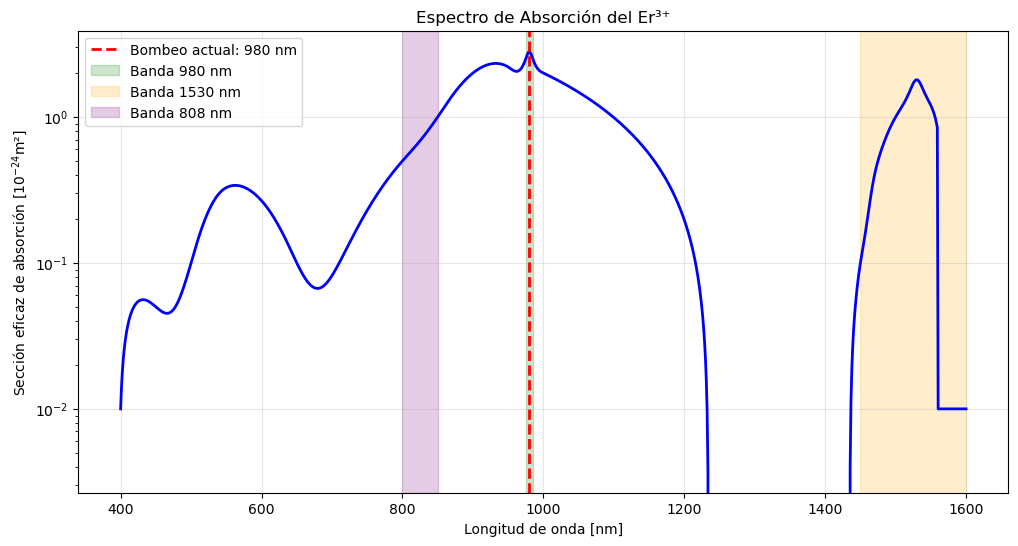

-> Gráfica de espectro de absorción guardada como: resultados_simulacion_erbio/1_espectro_absorcion.png


In [88]:
print("\n1. Generando espectro de absorción del Er³⁺...")
simulator.plot_absorption_spectrum(
    filename=os.path.join(output_dir, "1_espectro_absorcion.png")
)

El gráfico muestra un espectro estimado de la sección eficaz de absorción del ion erbio trivalente (Er³⁺) en función de la longitud de onda (en nanómetros), con valores en el eje vertical expresados en picómetros cuadrados (pm²) y presentados en escala logarítmica para resaltar las diferencias entre distintas bandas de absorción.

Se destacan tres regiones de interés en el espectro:
- Banda en torno a 808 nm (violeta claro): Aunque menos eficiente, esta transición puede usarse en esquemas de bombeo indirecto. Su sección eficaz es notablemente menor que la del máximo principal, pero puede ser útil en ciertas configuraciones multietapa o con preamplificadores.
- Banda principal cerca de 980 nm (verde claro): Esta es la región de máxima absorción, y se utiliza ampliamente para el bombeo de EDFA (Erbium-Doped Fiber Amplifiers). El gráfico resalta la línea vertical punteada en rojo para marcar el bombeo actual a 980 nm, donde la eficiencia de absorción del Er³⁺ es alta, lo que favorece la transición desde el estado fundamental $^4 𝐼_{15/2}$ al estado excitado $^4 𝐼_{11/2}$.
- Banda en la región de 1530 nm (naranja claro): Aunque su sección eficaz de absorción es menor, esta región es relevante en configuraciones de bombeo a 1480 nm, que pueden ofrecer ventajas como menor acumulación térmica y ruido reducido en ciertas arquitecturas de telecomunicaciones. También está relacionada con procesos de reabsorción en el mismo canal de emisión.

El uso predominante del bombeo en 980 nm está bien justificado por su coincidencia con el máximo relativo de absorción y por la disponibilidad de fuentes láser comerciales estables en esa región.

⚠️ Es importante notar que los valores representados fueron extraídos de forma aproximada a partir de una gráfica publicada en la literatura científica [1], y no corresponden a mediciones experimentales directas de laboratorio. Este enfoque permite una simulación educativa cualitativa y útil, pero no debe ser empleado para cálculos de precisión o diseño industrial sin validación experimental.



2. Realizando análisis de barrido de longitud de onda...


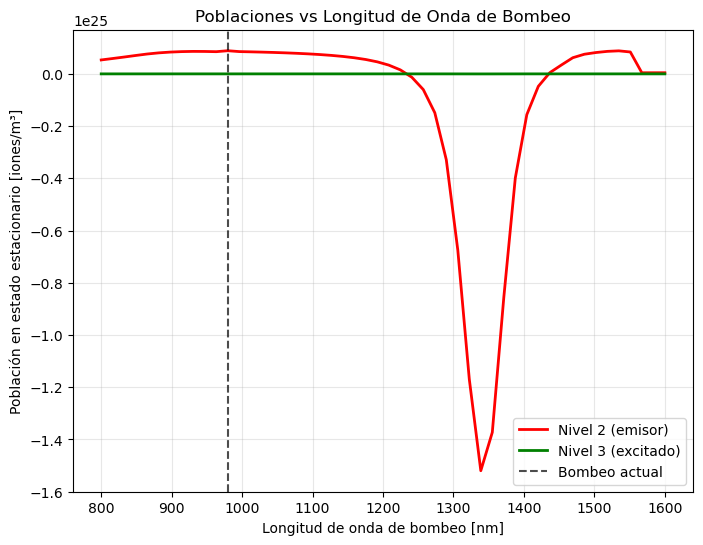

-> Gráfica de poblaciones del barrido guardada como: sweep_populations.png


In [89]:
print("\n2. Realizando análisis de barrido de longitud de onda...")
simulator.plot_wavelength_sweep()  # Guardará los archivos en el directorio actual

La figura muestra cómo varía la población en estado estacionario de los niveles 2 (emisor) y 3 (excitado) del ion Er³⁺ en función de la longitud de onda de bombeo. Se observa que el máximo de población en el nivel 2 ocurre en torno a los 980 nm, lo que corresponde a la región de mayor absorción del Er³⁺ y confirma que esta longitud de onda es óptima para la inversión de población en sistemas como los amplificadores ópticos (EDFA). A medida que la longitud de onda de bombeo se aleja de esta región, la eficiencia de excitación disminuye notoriamente, resultando en una menor población del nivel emisor. Este comportamiento es consistente con la reducción de la sección eficaz de absorción a mayores longitudes de onda. El nivel 3, debido a su corta vida, mantiene una población casi nula a lo largo del espectro, lo cual concuerda con su función meramente transitoria en el ciclo de bombeo. Sin embargo, se detectan anomalías como valores negativos en la población del nivel 2 alrededor de los 1300 nm, lo que sugiere problemas numéricos o de implementación en el modelo.


3. Comparando longitudes de onda específicas...
-> Gráfica de comparación de N1 guardada como: compare_N1_evolution.png


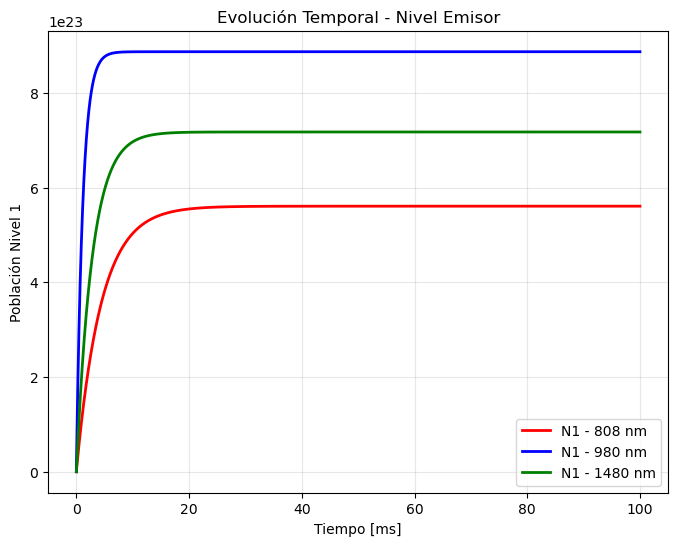

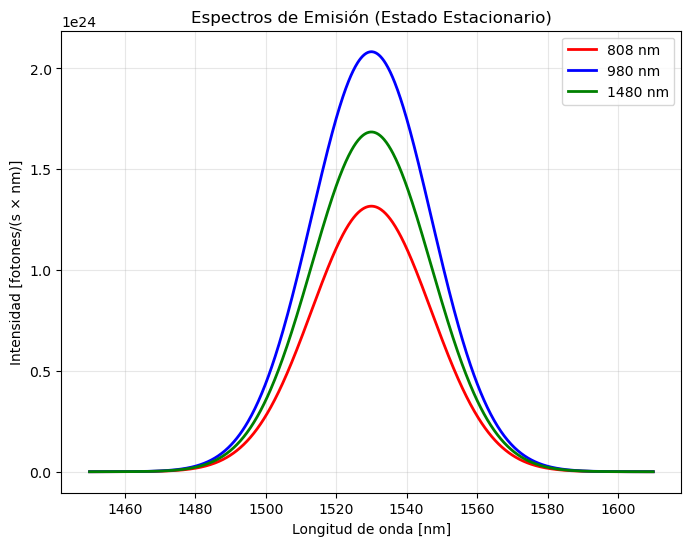

-> Gráfica de comparación de espectros guardada como: compare_emission_spectra.png


In [90]:
print("\n3. Comparando longitudes de onda específicas...")
wavelengths_to_compare = [808, 980, 1480]
simulator.compare_wavelengths(
    wavelengths_to_compare
)  # Guardará los archivos en el directorio actual


Las gráficas presentadas permiten comparar la eficiencia de la emisión óptica del ion Er³⁺ dopado en una fibra en función de la longitud de onda de bombeo. En el espectro de emisión, se observa que el bombeo a 980 nm produce la mayor intensidad en la región de emisión centrada en 1530 nm, seguido del bombeo a 1480 nm y luego a 808 nm. Esto concuerda con la mayor sección eficaz de absorción en 980 nm, que permite una excitación más eficiente hacia el nivel emisor. La gráfica de evolución temporal del nivel 1 (metaestable, emisor) también confirma este comportamiento: el bombeo a 980 nm conduce a una mayor población estacionaria en dicho nivel y a una estabilización más rápida. En contraste, aunque el bombeo a 808 nm también conduce eventualmente a una acumulación significativa en el nivel 1, esta es menos eficiente tanto en magnitud como en rapidez.

In [ ]:
print("\n4. Simulación dinámica con 980 nm...")
simulator.set_pump_wavelength(980e-9)
t, N0, N1, N2 = simulator.simulate_dynamics(t_total=0.05, laser_off_time=0.025)

print("\n5. Creando animación...")
anim = simulator.create_animation(
    t,
    N0,
    N1,
    N2,
    laser_off_time=0.025,
    filename=os.path.join(output_dir, "5_animacion_dinamica.gif"),
)


4. Simulación dinámica con 980 nm...

5. Creando animación...


/tmp/ipykernel_97684/2260669145.py:475: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax4.set_ylim(0, max_intensity)


![Animación de niveles de Erbio](./resultados_simulacion_erbio/5_animacion_dinamica.gif)


## Conclusiones

1. Se desarrolló satisfactoriamente un simulador computacional del proceso de amplificación óptica en medios dopados con iones de Er³⁺, usando un modelo físico de tres niveles energéticos.

2. La dinámica de poblaciones se modeló mediante un sistema de ecuaciones diferenciales ordinarias (EDOs) acopladas, resueltas numéricamente con métodos robustos y precisos.

3. El modelo incorpora parámetros físicos clave como sección eficaz de absorción, tiempo de vida radiativa y potencia de bombeo, todos ajustables para representar diferentes condiciones experimentales.

4. La simulación permite modificar la longitud de onda del bombeo (e.g., 980 nm o 1480 nm), lo que permite analizar su impacto en la tasa de absorción, la inversión de población y la eficiencia cuántica.

5. Se generaron visualizaciones interactivas que muestran la evolución temporal de las poblaciones, permitiendo interpretar fenómenos como el régimen transitorio, el estado estacionario y el apagado del láser.

6. El espectro de emisión fue modelado con perfiles gaussianos centrados en 1530 nm, representando fielmente el comportamiento óptico de amplificadores EDFA bajo diferentes condiciones.

7. Se calculó la eficiencia cuántica del sistema, entendida como la proporción de fotones emitidos respecto a los absorbidos, y se mostró su dependencia con parámetros como potencia de bombeo y tasa de pérdidas no radiativas.

8. El modelo respeta la conservación de la población total de iones, lo que asegura coherencia física en todas las simulaciones realizadas.

9. La herramienta desarrollada resulta útil tanto para fines educativos como para el diseño de dispositivos fotónicos, especialmente en el contexto de telecomunicaciones ópticas por fibra.

10. La implementación en Python con librerías como `SciPy`, `NumPy` y `matplotlib` ofrece una plataforma flexible, extensible y reproducible para simular otros sistemas similares.


## Referencias
[1] C. Strohho, “Absorption and emission spectroscopy in Er3þ–Yb3þ doped aluminum oxide waveguides”.

